# Tercera ejercitación de Laboratorio de Datos (1er cuatrimestre 2021)


In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

## Primer paso

In [ ]:
from keras.datasets import mnist,fashion_mnist

(X_train_raw, y_train), (X_test_raw, y_test) = fashion_mnist.load_data()  # cargo los dataset de entrenamiento y testeo

# reshapeamos para obtener un vector de 784 elementos (features) por cada imagen (samples)
X_train = X_train_raw.reshape(60000, -1) # no tocamos el numero de samples, 60000, pero reshapeamos las demas dimensiones
X_test = X_test_raw.reshape(10000, -1) # no tocamos el numero de samples, 60000, pero reshapeamos las demas dimensiones

X_train = X_train.astype('float32') # transformamos el tipo de datos a "float32"
X_test = X_test.astype('float32') # transformamos el tipo de datos a "float32"

# normalizamos por el maximo valor que pueden tener los pixels para que los valores queden entre 0 y 1
X_train = X_train/255.0
X_test = X_test/255.0

# print the final input shape ready for training
print("Matriz de entrenamiento shape", X_train.shape)
print("Matriz de testeo shape", X_test.shape)

Matriz de entrenamiento shape (60000, 784)
Matriz de testeo shape (10000, 784)


In [ ]:
from sklearn.decomposition import PCA

# Creo el modelo de PCA con tantas componentes principales como features del dataset
pca = PCA(n_components=None)

# Ajusto el conjunto de entramiento al modelo
pca.fit(X_train)

# Obtengo la descripción de los datos en el espacio de componentes principales
X_train_pca = pca.transform(X_train)

## Segundo paso

Obtengo y ploteo la varianza explicada por cada componente y la varianza explicada acumulada vs. número de componentes.

Text(0.5, 0, 'Cantidad de componentes principales')

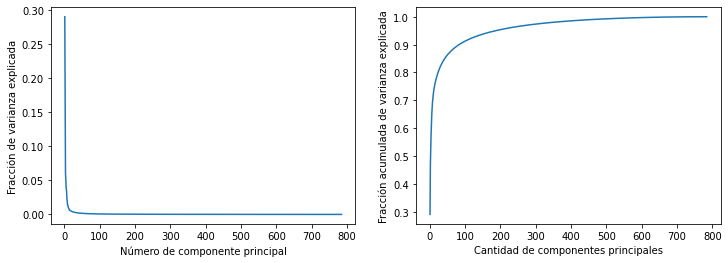

In [ ]:
evr = pca.explained_variance_ratio_

# Graficamos la fracción de varianza que aporta cada componente
# y la información acumulada
fig, ax = plt.subplots(1, 2, figsize = (12, 4))

ax[0].plot(range(1, len(evr) + 1), evr)
ax[0].set_ylabel('Fracción de varianza explicada')
ax[0].set_xlabel('Número de componente principal')

# Calculamos el acumulado con la función cumsum de numpy 
varianza_acumulada = np.cumsum(evr)

ax[1].plot(range(1, len(evr) + 1), varianza_acumulada)
ax[1].set_ylabel('Fracción acumulada de varianza explicada')
ax[1].set_xlabel('Cantidad de componentes principales')

De ambas curvas puede extraerse que la mayoría de la varianza está explicada por las primeras pocas componenetes.

## Tercer paso

Visualizo las primeros cinco componentes en orden de varianza explicada.

In [ ]:
# Creo un vector cuyos elementos son las primeras 5 componentes principales.
# Al mismo tiempo, cada componentes fue 'reshapeada' para volver a ser una matriz 24x24.
componentes = [pca.components_[n].reshape(28, 28) for n in range(5)]

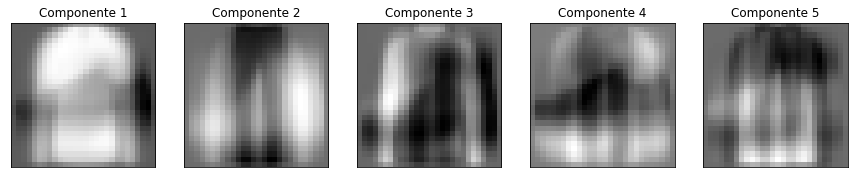

In [ ]:
# Grafico las 5 primeras componentes principales.
fig, ax = plt.subplots(1, 5, figsize = (15, 6))
for n in range(5):
  ax[n].imshow(componentes[n], cmap="gray")  # visualizo las imágenes
  ax[n].set_title('Componente {}'.format(n + 1))
  ax[n].set_xticks([]) # le saco los ticks en el eje X
  ax[n].set_yticks([]) # le saco los ticks en el eje Y


## Cuarto paso

Elijo 4 imágenes al azar y muestro la reconstrucción obtenida usando 2, 10, 25, 50 y 100 componentes.

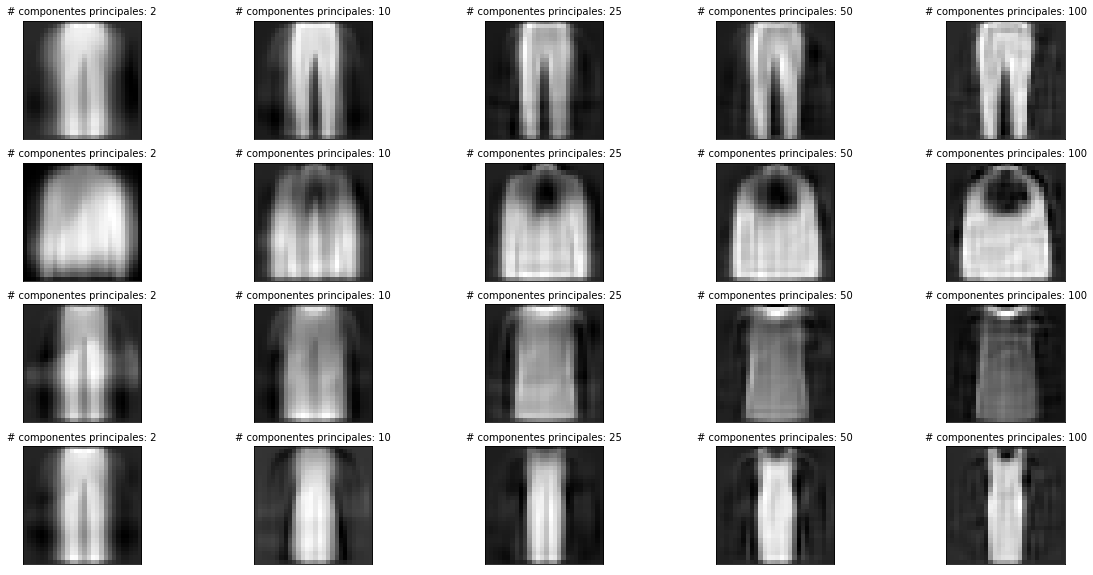

In [ ]:
cant_img = 4

fig, ax = plt.subplots(cant_img, 5, figsize = (20, 10)) # seteo el tamano de la figura

for i in range(cant_img):

  fig_fil = 0 # Indice para indicar la fila de la figura
  nro_rand = np.random.randint(0, 60000) # Elijo un índice aleatorio de alguna imagen del dataset. 
                                         # Será igual para una misma fila y muy probablemente distinto para filas distintas

  # Recorro distinta cantidad de componentes
  for p in [2, 10, 25, 50, 100]:

    # Creación del modelo de PCA con p componentes
    pca = PCA(n_components = p)

    # Ajuste y transformación de los datos
    pca.fit(X_train)
    X_pca = pca.transform(X_train)

    # Reconstrucción de la imagen desde el espacio reducido
    X_r = pca.inverse_transform(X_pca)

    # Ploteo de la imagen reconstruida
    
    ax[i, fig_fil].imshow(X_r[nro_rand, :].reshape(28, 28), interpolation='none', cmap="gray") # plotea la imagen de índice faceid en formato (28,28) para imagenes en escala de grises (tengo que reshapear)
    
    ax[i, fig_fil].set_title("# componentes principales: {}".format(p), fontsize = 10) # pongo el titulo a los plots con el identificador unico de la persona 
    
    ax[i, fig_fil].set_xticks([]) # le saco los ticks en el eje X
    ax[i, fig_fil].set_yticks([]) # le saco los ticks en el eje Y

    fig_fil += 1

plt.show()

Cada fila representa una imagen inicial distinta y cada columna, para una fila dada, representa la imagen original siendo reconstruida por un cierto número de componentes principales. Notar que a mayor cantidad de componentes principales, más fielmente se recontruye la imagen original.

## Quinto paso

Visualizo los datos en un espacio de dimensión reducida formado por la 1era vs. la 2da componentes principales, usando scatterplot.

Text(0, 0.5, 'Segunda componente principal')

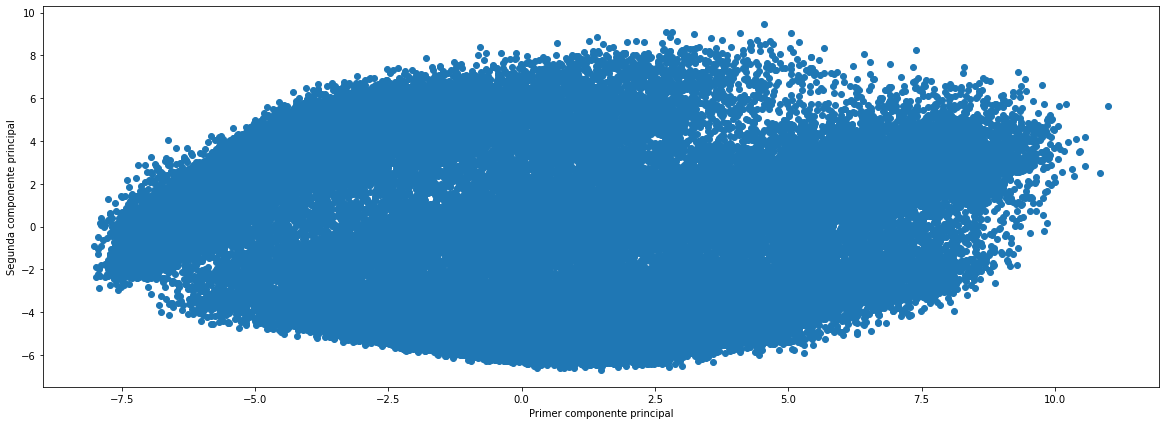

In [ ]:
fig, ax = plt.subplots(figsize = (20, 7))

# Hacemos un scatter plot de cada uno de los datos
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1])

ax.set_xlabel('Primer componente principal')
ax.set_ylabel('Segunda componente principal')

## Sexto paso

Hago k-means con k=2 sobre los datos del espacio 2D formado por la primera y segunda componente principal.

In [ ]:
from sklearn.cluster import KMeans

# Creo el modelo KMeans con k = 2
kmeans = KMeans(n_clusters=2)

# Ajusto el modelo a los datos reducidos a las dos componentes principales
kmeans.fit(X_train_pca[:,:2])


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Grafico cómo los datos quedan agrupados en dos clusters al usar el modelo.

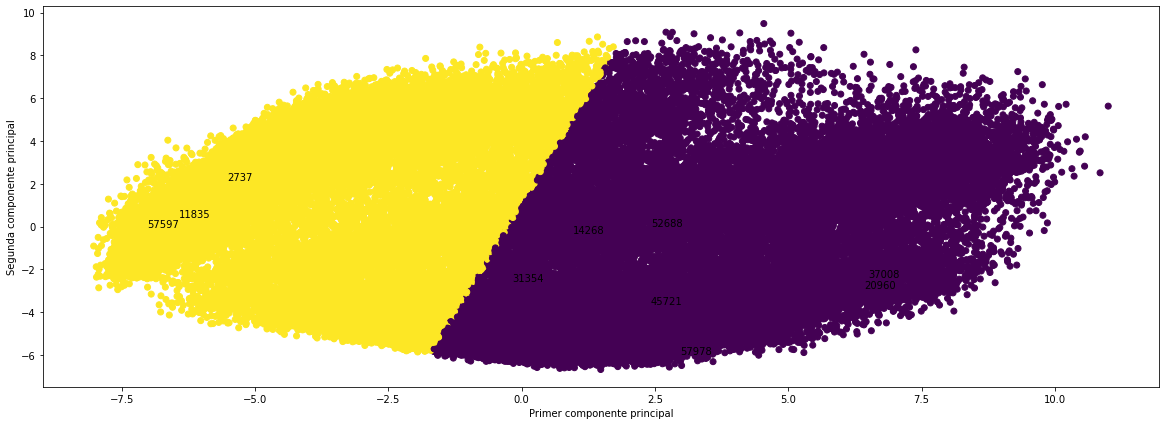

In [ ]:
fig, ax = plt.subplots(figsize = (20, 7))

# Hago un scatter plot de cada uno de los datos con su respectiva etiqueta
ax.scatter(X_train_pca[:,0], X_train_pca[:,1], c=kmeans.labels_)
ax.set_xlabel('Primer componente principal')
ax.set_ylabel('Segunda componente principal')

# Escribo la instancia de 10 imágenes aleatorias
for i in range(10):
  nro_rand = np.random.randint(0, 60000)
  ax.text(X_train_pca[nro_rand, 0], X_train_pca[nro_rand, 1], s = nro_rand)

Averiguo cómo es la etiqueta asignada a cada cluster, usando dos de las instancias graficadas.

In [ ]:
print('La etiqueta del cluster amarillo/izquierdo es {}'.format(kmeans.labels_[57597]))
print('La etiqueta del cluster violeta/derecho es {}'.format(kmeans.labels_[37008]))

La etiqueta del cluster amarillo/izquierdo es 1
La etiqueta del cluster violeta/derecho es 0


Visualizo algunas de las instancias que se grafican en cada cluster.

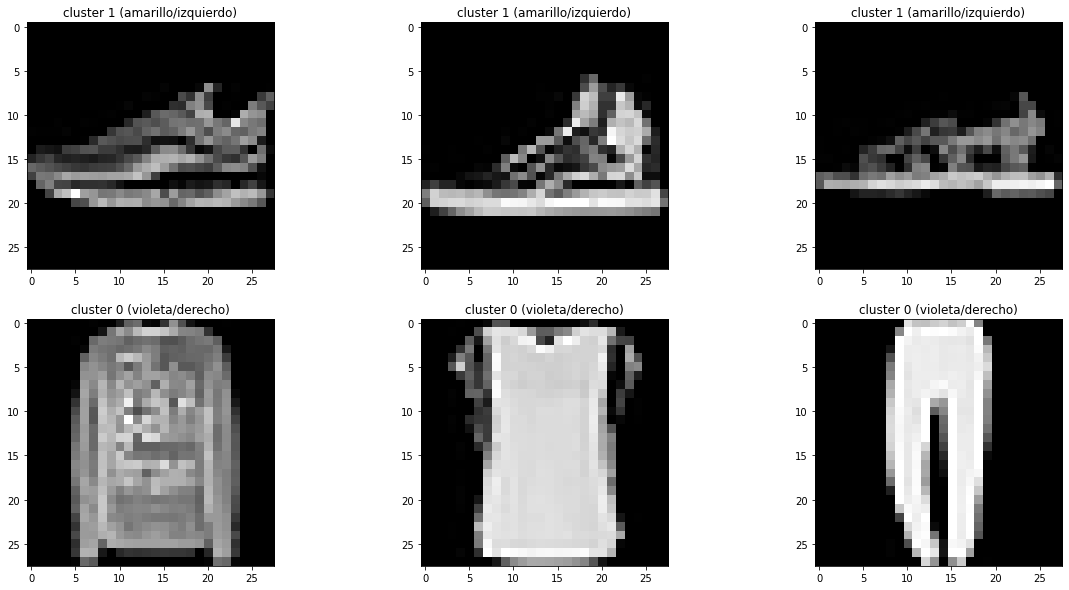

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (20, 10)) # seteo el tamano de la figura en un layout de 2x3

# Imágenes del cluster 1 (amarillo/izquierdo)
ax[0, 0].imshow(X_train[11835, :].reshape(28, 28), interpolation='none', cmap="gray")
ax[0, 1].imshow(X_train[2737, :].reshape(28, 28), interpolation='none', cmap="gray")
ax[0, 2].imshow(X_train[57597, :].reshape(28, 28), interpolation='none', cmap="gray")

# títulos del cluster 1 (amarillo/izquierdo)
for i in range(3) : 
  ax[0, i].set_title("cluster 1 (amarillo/izquierdo)") 

# Imágenes del cluster 0 (violeta/derecho)
ax[1, 0].imshow(X_train[52688, :].reshape(28, 28), interpolation='none', cmap="gray")
ax[1, 1].imshow(X_train[37008, :].reshape(28, 28), interpolation='none', cmap="gray")
ax[1, 2].imshow(X_train[57978, :].reshape(28, 28), interpolation='none', cmap="gray")

# títulos del cluster 0 (violeta/derecho)
for i in range(3) : 
  ax[1, i].set_title("cluster 0 (violeta/derecho)") 

A primera vista, parece que el cluster 1 (amarillo/izquierdo) agrupa las imágenes de calzados, mientras que el cluster 0 (violeta/derecho) agrupa las imágenes de prendas como remeras, abrigos y pantalones (algo en la verticalidad de la prenda o los laterales negros quizás).

## Séptimo paso

Entreno un modelo KNN (K=5) usando los datos de entrenamiento (con todos los features, no solo las primeras dos componentes principales) y uso como etiquetas los ids obtenidos con el clustering del paso anterior.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5) # Creo el clasificador KNN (K=5)
clf.fit(X_train, kmeans.labels_); # Ajusto los datos al clasificador. kmeans.labels_ son los ids obtenidos con el clustering.

## Octavo paso

Armo un nuevo vector de etiquetas que reemplace a y_test: pongo 1 donde pienso que ese ejemplo iría al cluster 1 y 0 donde pienso que iría al cluster 0.

Para eso, asumo que en el cluster 1 irían los calzados y bolsos, y en el cluster 0 las remeras, buzos, pantalones, camisas, etc. 

Entonces quedaría:

*   Cluster 1:
  * Sandal (label 5)
  * Sneaker (label 7)
  * Bag (label 8)
  * Ankle boot (label 9)
*   Cluster 0:
  * T-shirt/top (label 1)
  * Trouser (label 2)
  * Dress (label 3)
  * Coat (label 4)
  * Shirt (label 6)

In [ ]:
cluster_1 = [5, 7, 8, 9]    # Lista con los labels correspondientes al cluster 1. 
                            # Si el elemento no está en esta lista entonces es del cluster 0.

y_test_bin = y_test.copy() # Primero copio el vector y_test al nuevo, el cual tiene 'bin' de 'binario'.

# Pongo 1 en y_test_bin[i] si pertenece al cluster 1, y 0 si pertenece al cluster 0.
for i in range(len(y_test_bin)):
  if y_test_bin[i] in cluster_1: 
    y_test_bin[i] = 1
  else: 
    y_test_bin[i] = 0;

## Noveno paso

Aplico el modelo KNN a los primeros 1000 datos del dataset de evaluación (X_test) y genero las predicciones.

In [ ]:
y_test_pred = clf.predict(X_test[:1000, :])

Usando las ids obtenidas mediante el procedimiento del paso anterior, y las predichas por KNN en el séptimo paso, construyo una matriz de confusión para evaluar la performance de dicho clasificador KNN. Con la misma puedo también calcular la BA del modelo: 

In [ ]:
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test_bin[:1000], y_test_pred)  # Creo la matriz de confusión 

def balanced_accuracy(cm):
  sensibilidad = cm[1,1]/(cm[1,1]+cm[0,1])
  especificidad = cm[0,0]/(cm[1,0]+cm[0,0])
  return [sensibilidad, especificidad, (sensibilidad + especificidad)/2]

metricas = balanced_accuracy(cm)

print('Matriz de confusion del modelo es:')
print(cm)   
print('BA del modelo es de: {}'.format(round(metricas[2],4))) 

Matriz de confusion del modelo es:
[[501 127]
 [ 47 325]]
BA del modelo es de: 0.8166


Como puede verse, solamente con haber considerado las dos componentes principales y algunas suposiciones sobre qué tipo de prenda pertenecía a qué cluster, el modelo ya arroja una BA "relativamente buena"  de 0.8166.